# Overview
* Here, I compare SPM and nilearn results. 
* The purpose is to ensure that SPM and nilearn produce consistent results. 
* By confirming the similarities, we can confidently proceed with the reliability of nilearn's single trial data algorithm. 

In [33]:
from os.path import join
import nilearn
from nilearn import plotting
import neuromaps
from surfplot import Plot
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
import nibabel as nib
import numpy as np

In [46]:
def plot_surf_box(surfaces, surf_lh, surf_rh, title):

    lh, rh = surfaces['inflated']

    p = Plot(surf_lh=lh, surf_rh=rh) #, size=(600, 600)) #, layout='column')
    p.add_layer({'left': surf_lh, 
                'right': surf_rh}, #stimP_rh}, 
                cmap=nilearn_cmaps['cold_hot'],#cm.seismic, 
                cbar=True)

    kws = dict(location='right', draw_border=False, aspect=10, shrink=.2,
            decimals=0, pad=0)
    fig = p.build(cbar_kws=kws)
    fig.axes[0].set_title(title, pad=-3)

    fig.show()


import numpy as np
import nibabel as nib
import neuromaps

def process_medial_wall(data_path, spm_dir, fslr_density='32k', data_dir='/tmp'):
    """
    Masks out the medial wall from the provided data.

    Parameters:
    - data_path: Path to the data file.
    - spm_dir: Directory containing the spm data.
    - fslr_density: Density of the fslr data (default is '32k').
    - data_dir: Directory to fetch the fslr data (default is '/tmp').

    Returns:
    - stimP_lh: Left hemisphere data with medial wall masked out.
    - stimP_rh: Right hemisphere data with medial wall masked out.
    """
    
    stimHgtL_P = neuromaps.transforms.mni152_to_fslr(
        join(spm_dir, data_path),
        fslr_density=fslr_density, 
        method='linear'
    )
    
    fslr = neuromaps.datasets.fetch_fslr(density=fslr_density, data_dir=data_dir)
    
    stimP_lh = stimHgtL_P[0].darrays[0].data
    stimP_rh = stimHgtL_P[1].darrays[0].data
    
    fslr_medial_L = nib.load(fslr['medial'][0])
    fslr_medial_R = nib.load(fslr['medial'][1])
    
    medial_indexL = np.where(fslr_medial_L.darrays[0].data == 0)[0]
    medial_indexR = np.where(fslr_medial_R.darrays[0].data == 0)[0]
    
    stimP_lh[medial_indexL] = np.nan
    stimP_rh[medial_indexR] = np.nan
    
    return stimP_lh, stimP_rh




In [15]:
spm_dir_6cond = '/Users/h/Documents/projects_local/cue_expectancy/analysis/fmri/spm/univariate/model01_6cond_ttl/2ndlevel'
# spm_dir_ceso = 

In [ ]:
from neuromaps.transforms import mni152_to_fslr
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from surfplot.utils import threshold

memory_lh, memory_rh = mni152_to_fslr(retreivalGTencode)
posner_lh, posner_rh = mni152_to_fslr(posnernii)
saxe_lh, saxe_rh     = mni152_to_fslr(saxenii)
spunt_lh, spunt_rh   = mni152_to_fslr(spuntnii)

## plot SPM 6 cond maps (contrasts)

### pain


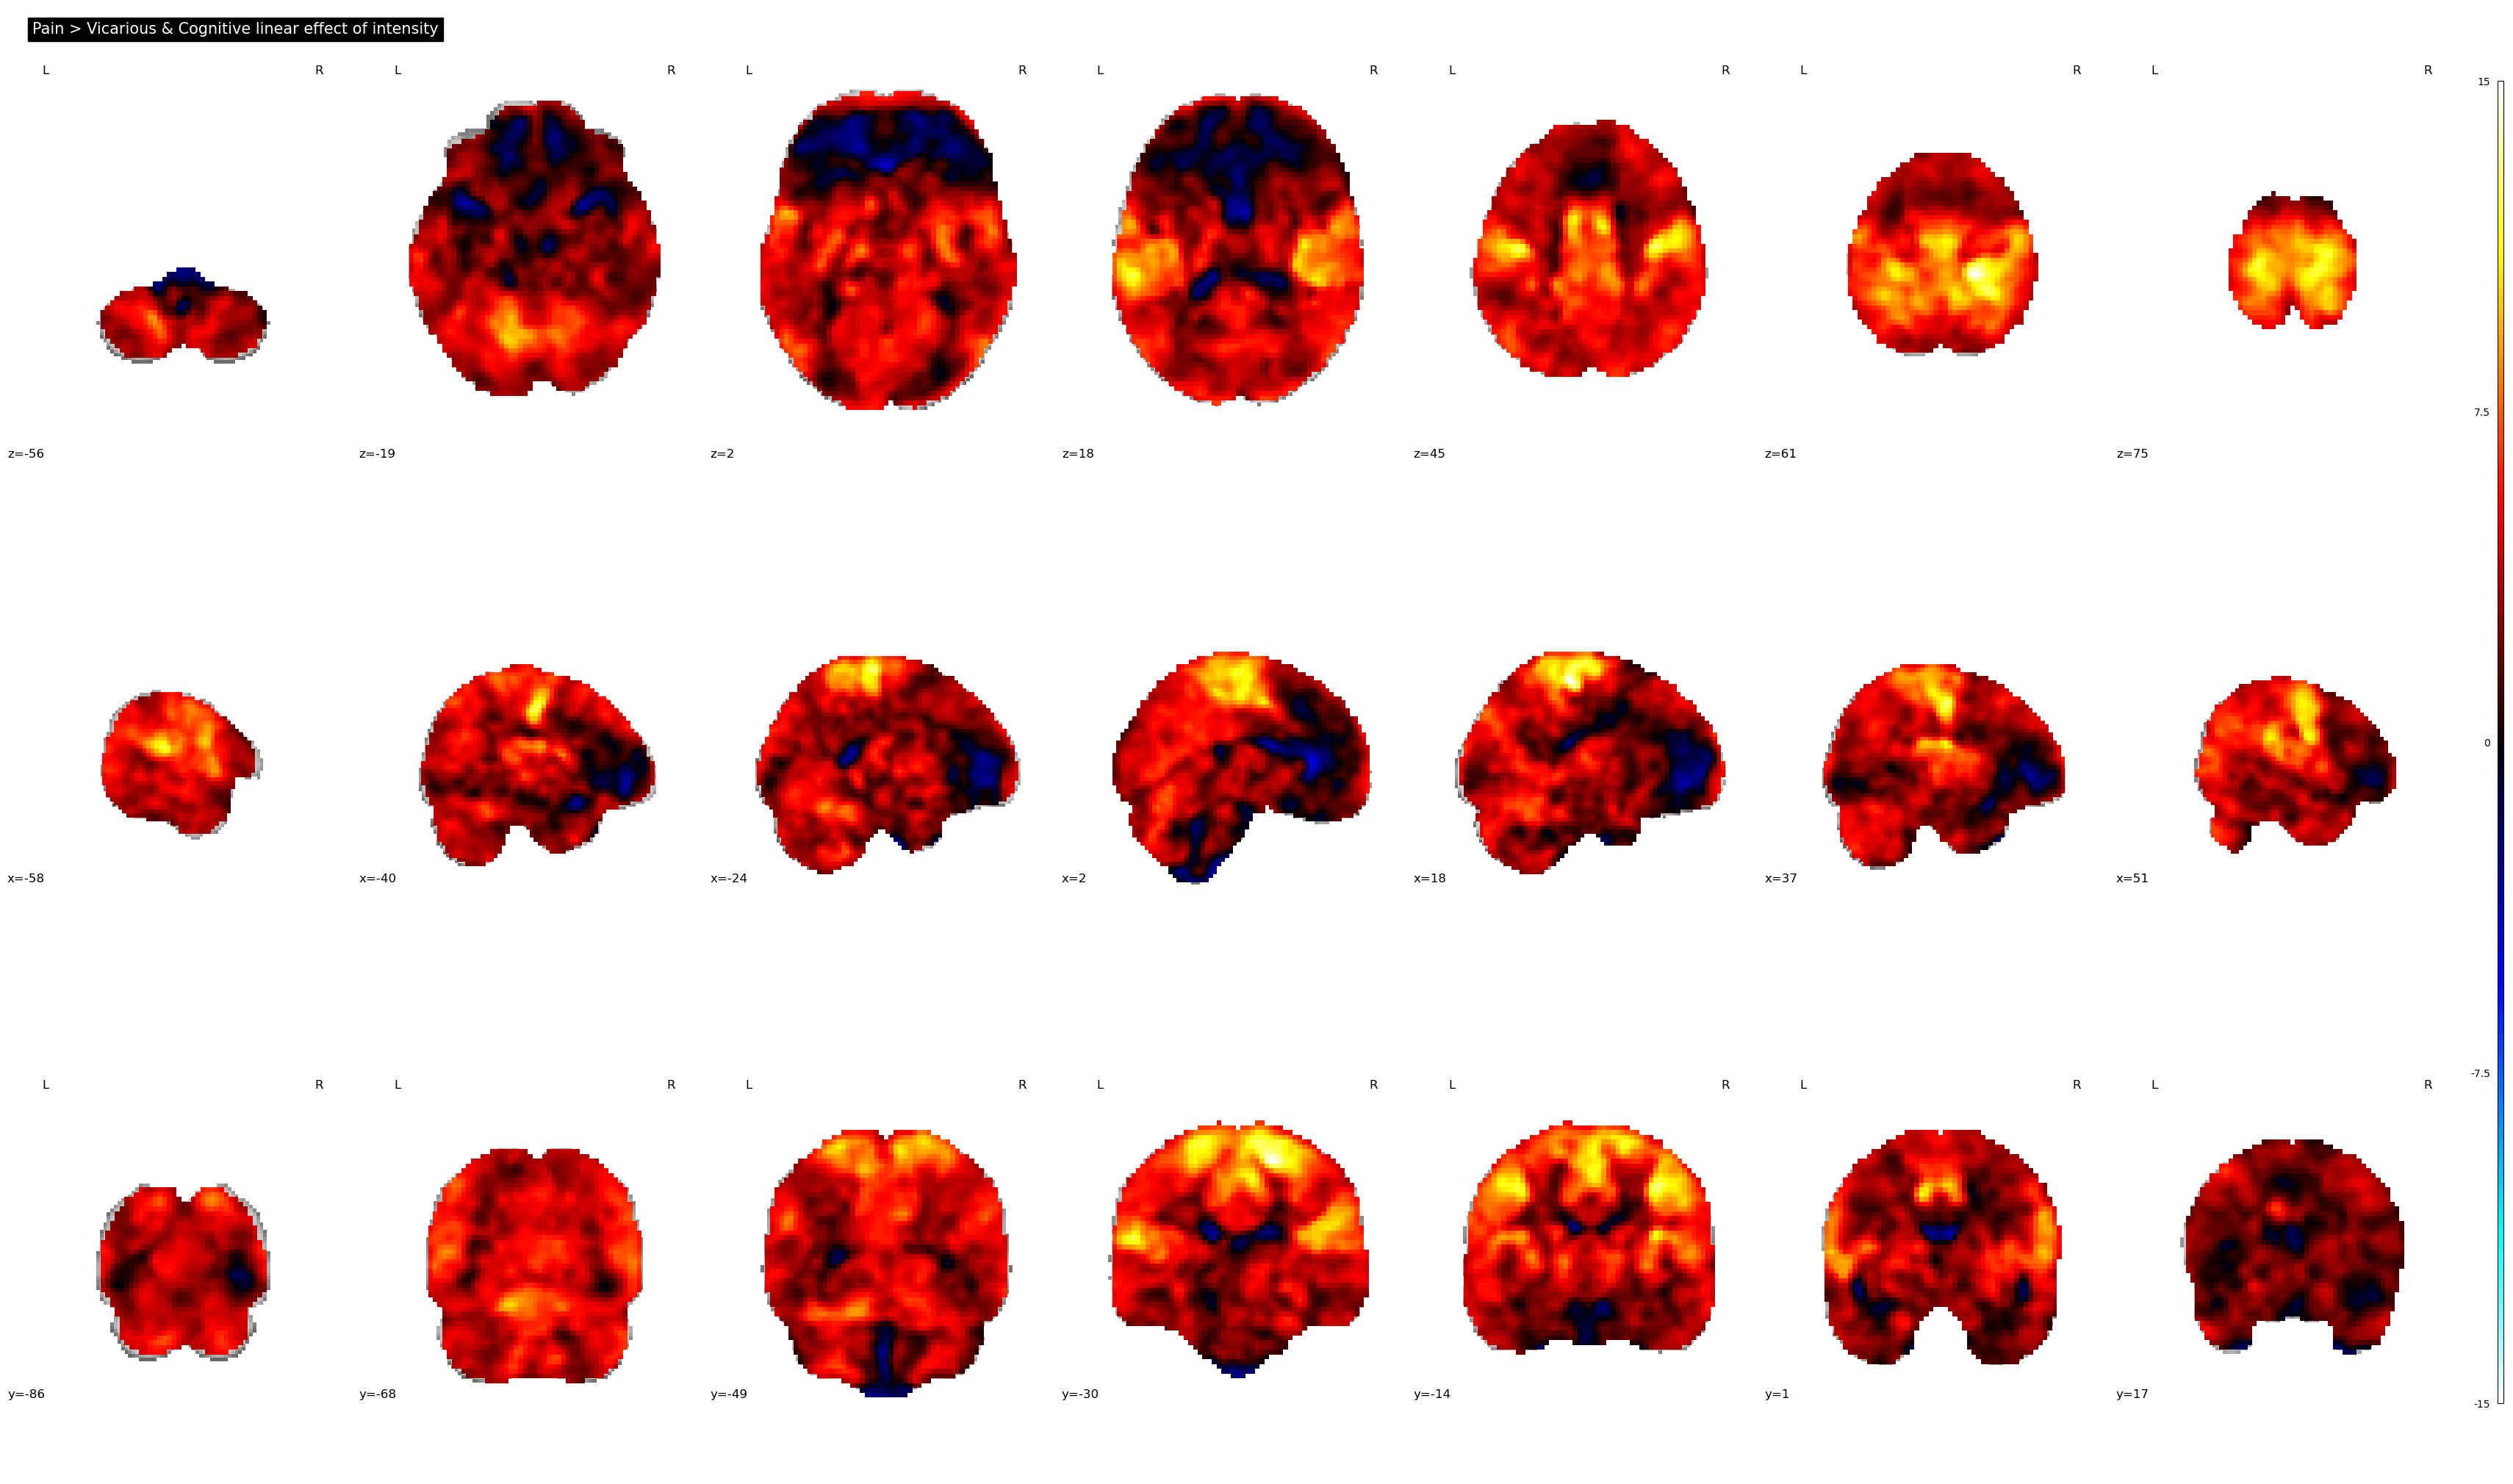

In [19]:
plotting.plot_stat_map(
    join(spm_dir_6cond, 'ttl1_6cond_stimlinear_contrast_P_VC_stimlin_high_gt_low_fdr-05.nii'), 
    # threshold=3, 
    display_mode="mosaic",
    title='Pain > Vicarious & Cognitive linear effect of intensity')

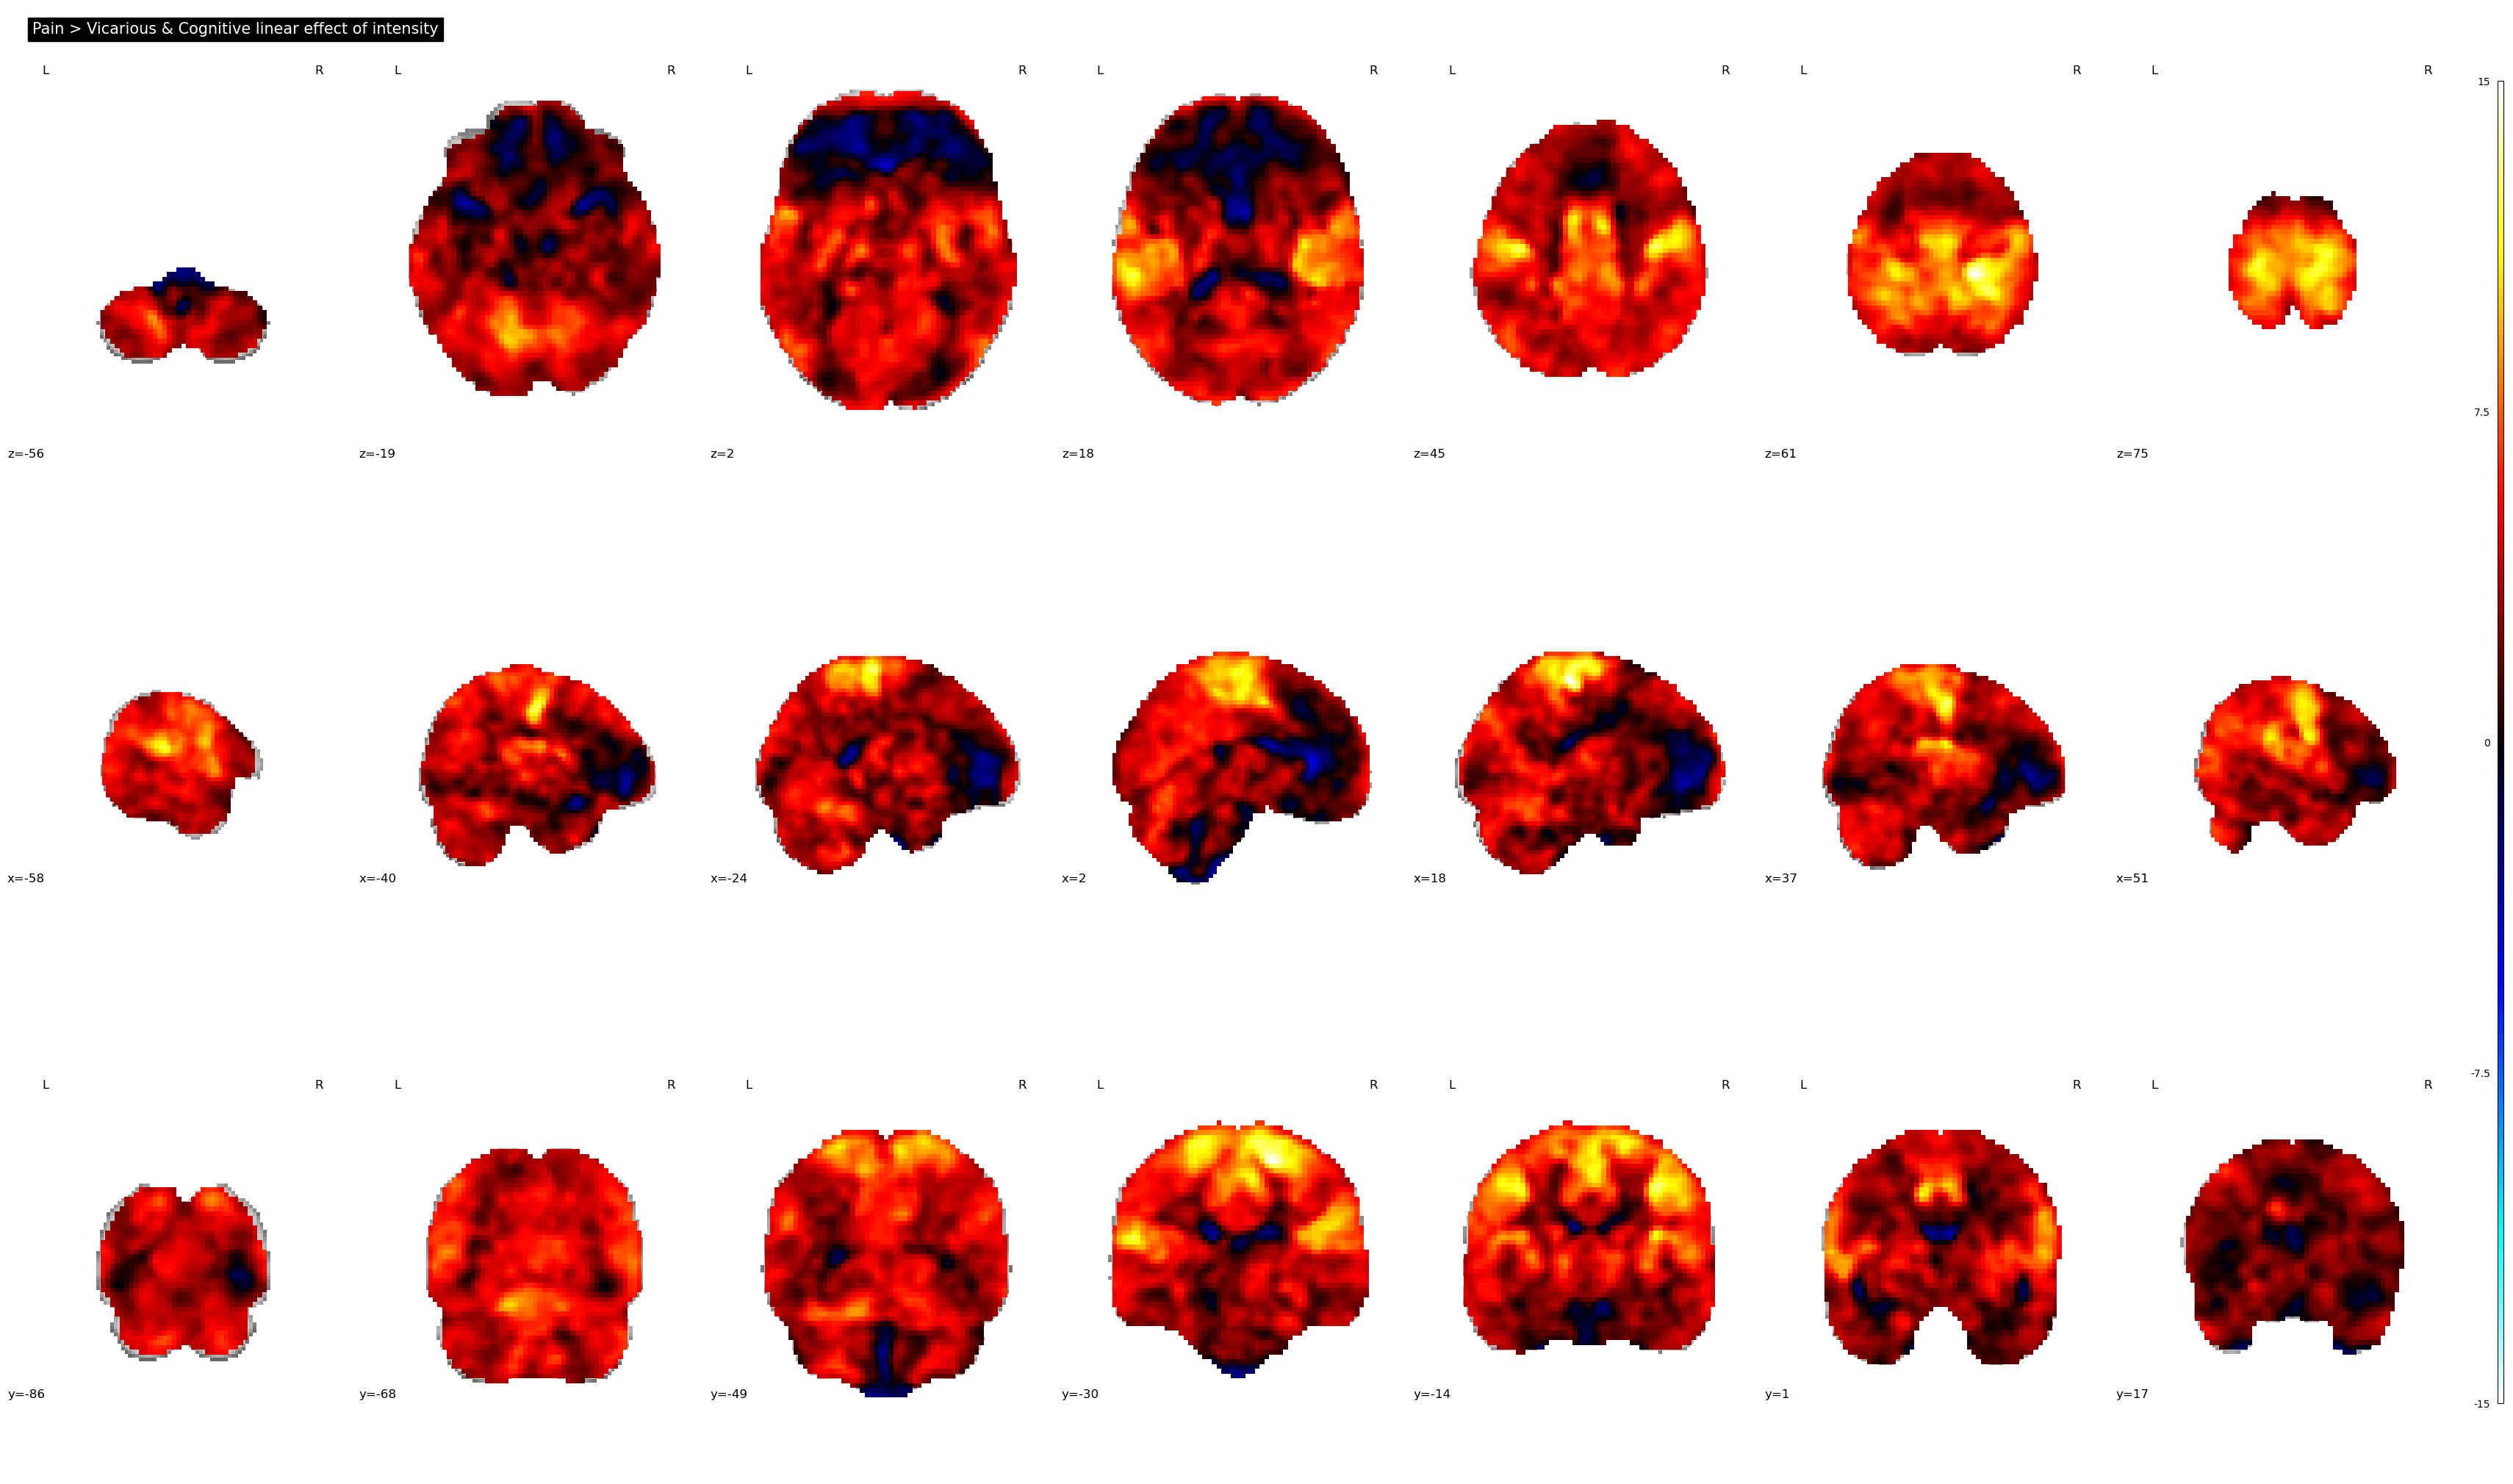

In [17]:
plotting.plot_stat_map(
    join(spm_dir_6cond, 'ttl1_6cond_stimlinear_contrast_P_VC_stimlin_high_gt_low_fdr-001.nii'),
    # threshold=3, 
    display_mode="mosaic",
    title='Pain > Vicarious & Cognitive linear effect of intensity')

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_52623/1176695248.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


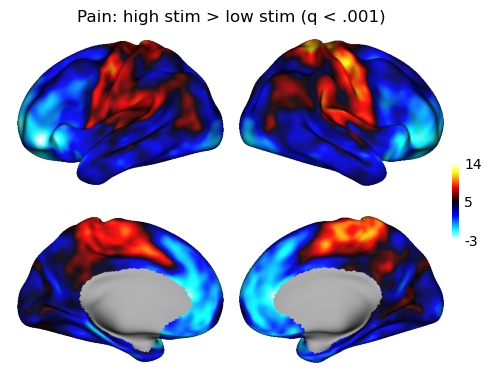

: 

In [56]:
stimP_lh_processed, stimP_rh_processed = process_medial_wall(
    data_path='ttl1_6cond_stimlinear_contrast_P_VC_stimlin_high_gt_low_fdr-001.nii',
    spm_dir=spm_dir_6cond
)

taskname = 'pain'
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
plot_surf_box(surfaces, 
          surf_lh=stimP_lh_processed, 
          surf_rh= stimP_rh_processed, 
          title=f'{taskname.title()}: high stim > low stim (q < .001)')

### vicarious

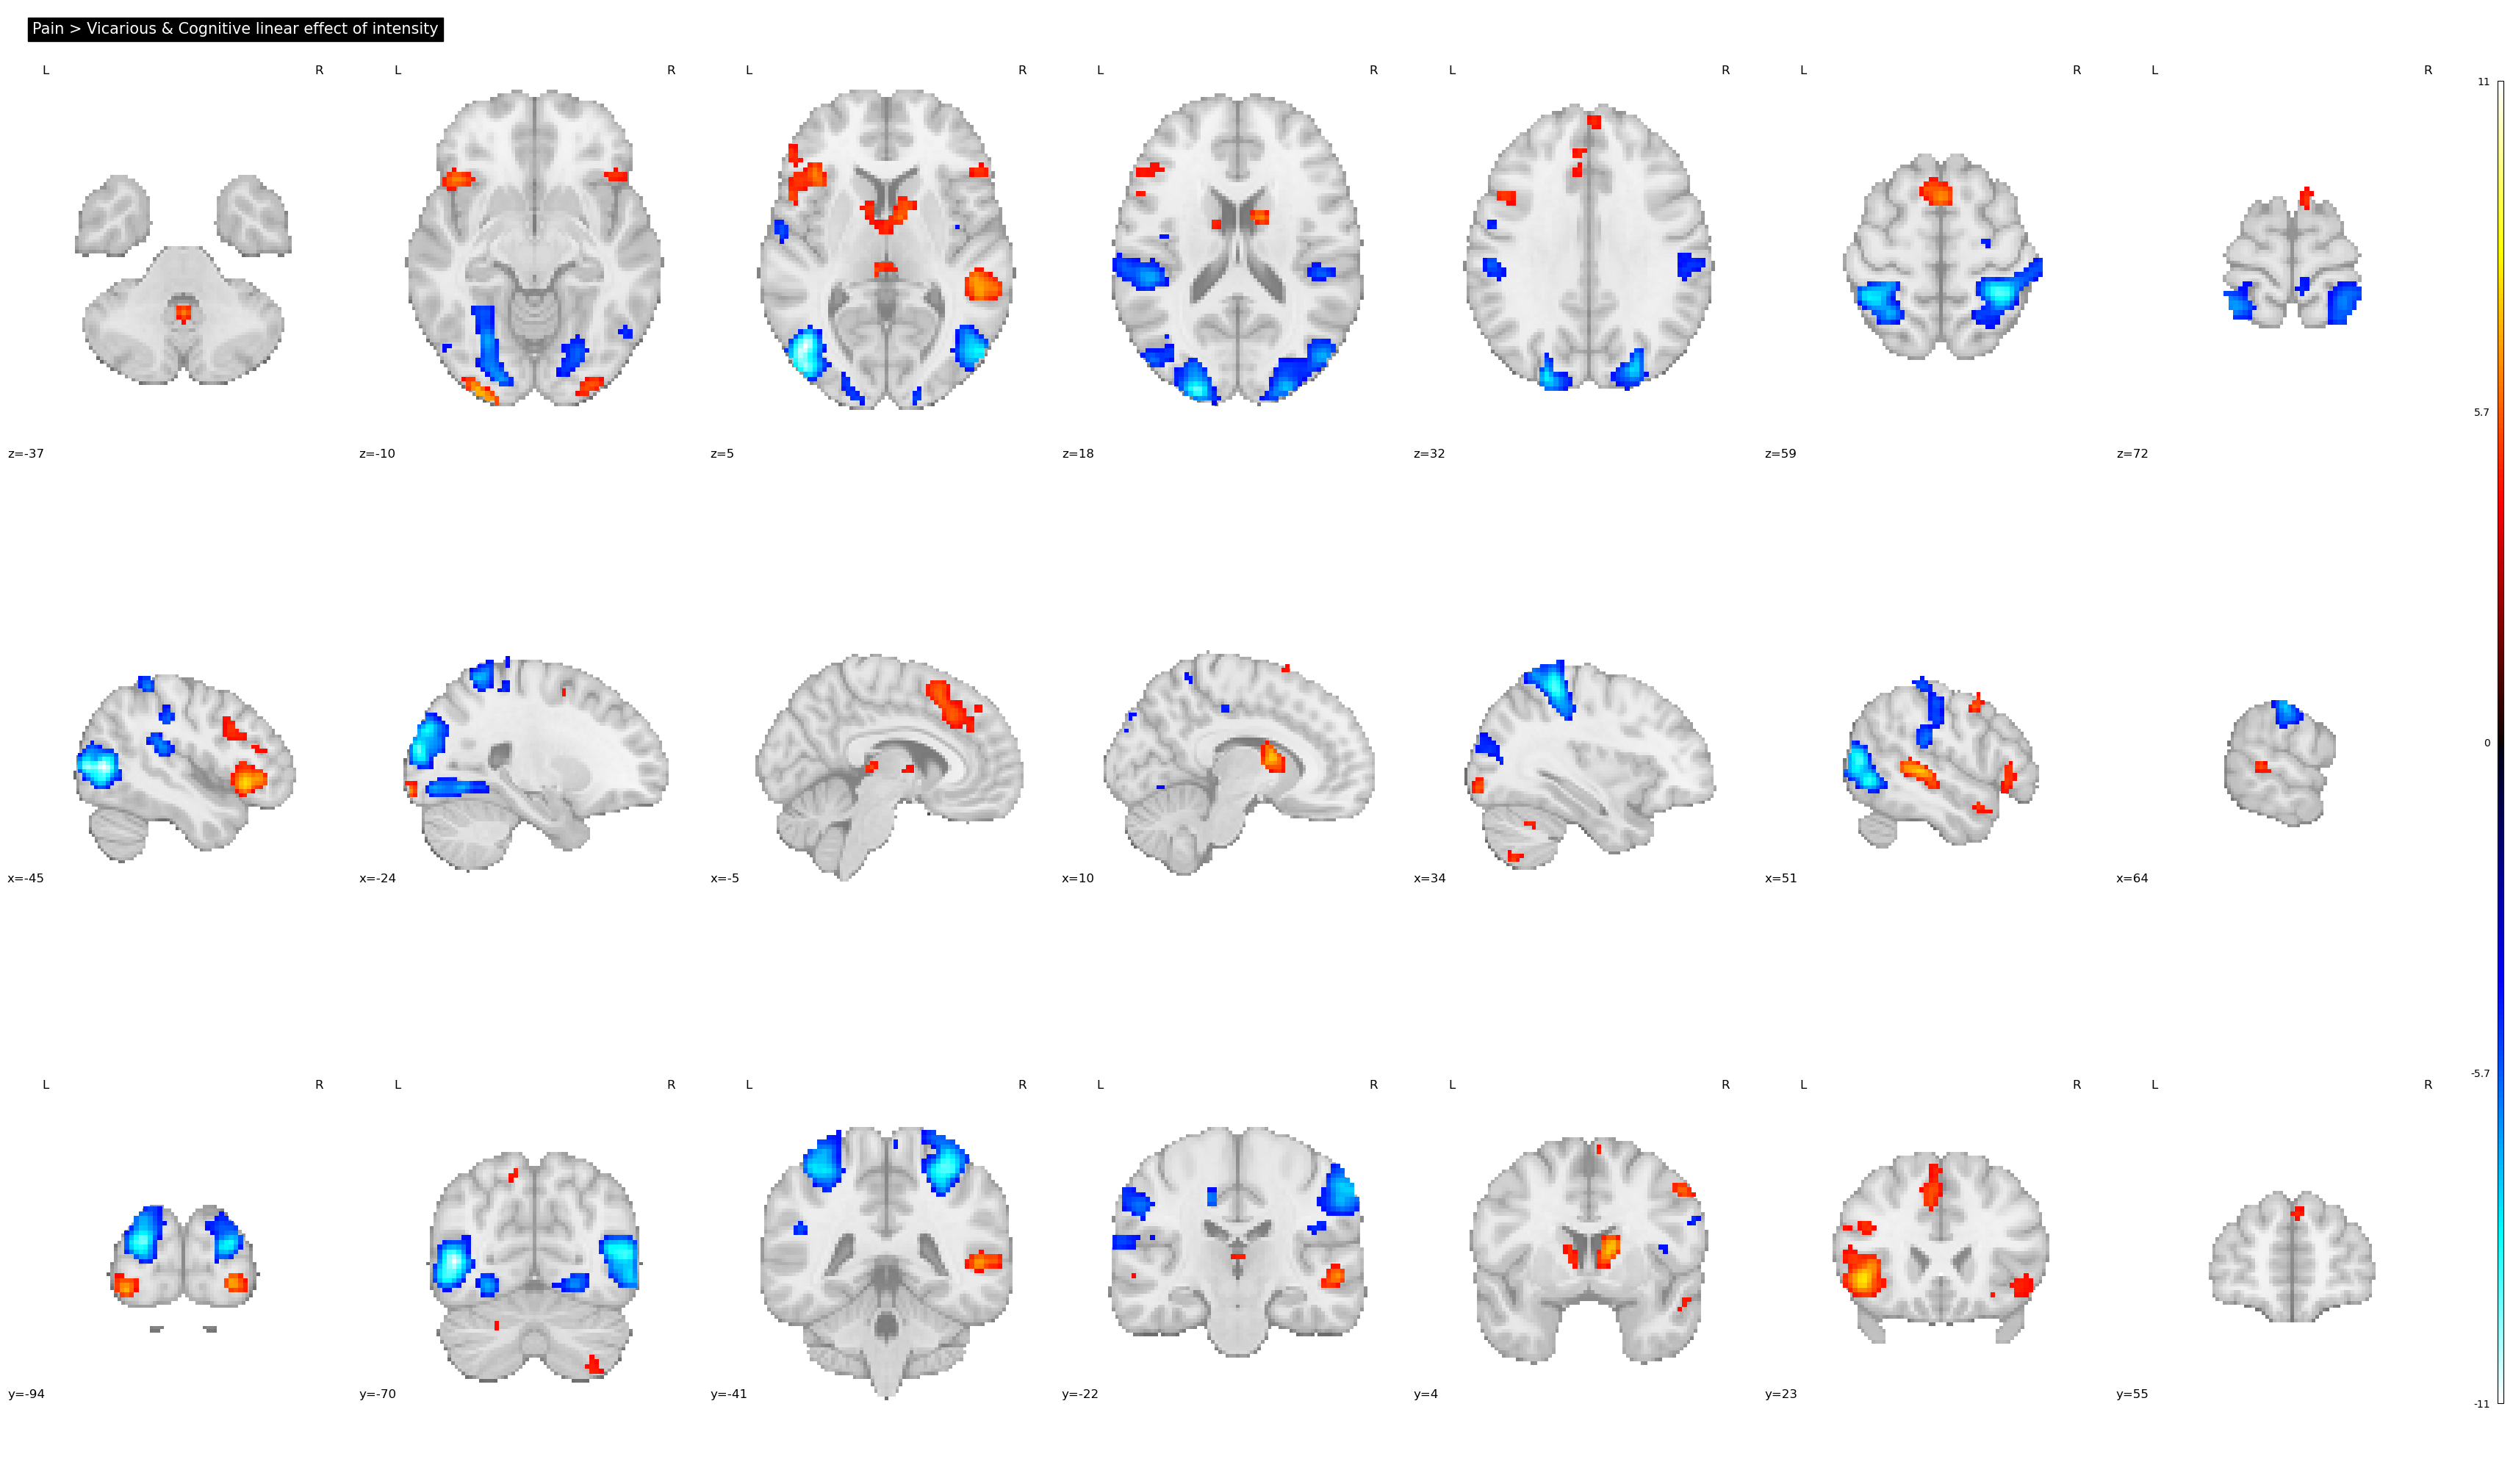

In [12]:
plotting.plot_stat_map(
    join(spm_dir_6cond, 'ttl1_6cond_stimlinear_dummy_V_simple_stimlin_high_gt_low_fdr-001.nii'), 
    # threshold=3, 
    display_mode="mosaic",
    title='Vicarious > Pain & Congitive linear effect of intensity')

### cognitive

In [ ]:
stimHgtL_P = neuromaps.transforms.mni152_to_fslr(
    join(spm_dir_6cond, 'NAME'),
    fslr_density='32k', 
    method='linear')
stimP_lh = stimHgtL_P[0].darrays[0].data
stimP_rh = stimHgtL_P[1].darrays[0].data

taskname = 'pain'
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
plot_surf_box(surfaces, 
          surf_lh=stimP_lh, 
          surf_rh= stimP_rh, 
          title=f'{taskname.title()} High stim > low stim > Vicarious & Cognitive contrast (q < .05)')

## plot nilearn 6 cond maps

### pain


### vicarious

### cognitive

## plot SPM 6 cond maps (dummy)

### pain

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_52623/1176695248.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


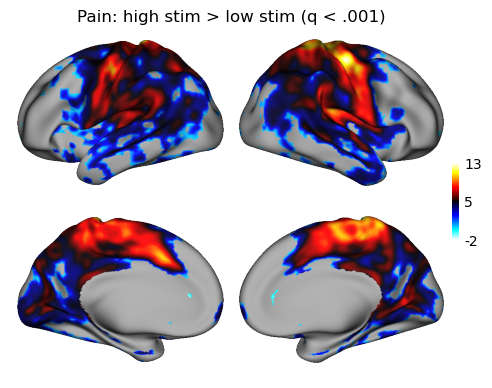

In [53]:
stimP_lh_processed, stimP_rh_processed = process_medial_wall(
    data_path='ttl1_6cond_stimlinear_dummy_P_simple_stimlin_high_gt_low_fdr-001.nii',
    spm_dir=spm_dir_6cond
)

taskname = 'pain'
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
plot_surf_box(surfaces, 
          surf_lh=stimP_lh_processed, 
          surf_rh= stimP_rh_processed, 
          title=f'{taskname.title()}: high stim > low stim (q < .001)')

### vicarious

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_52623/1176695248.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


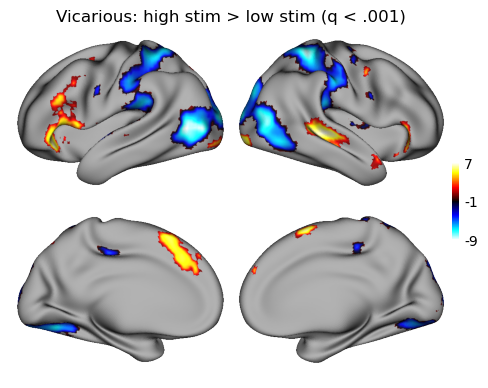

In [54]:
stimV_lh_processed, stimV_rh_processed = process_medial_wall(
    data_path='ttl1_6cond_stimlinear_dummy_V_simple_stimlin_high_gt_low_fdr-001.nii',
    spm_dir=spm_dir_6cond
)

taskname = 'vicarious'
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
plot_surf_box(surfaces, 
          surf_lh=stimV_lh_processed, 
          surf_rh= stimV_rh_processed, 
          title=f'{taskname.title()}: high stim > low stim (q < .001)')

### cognitive

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_52623/1176695248.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


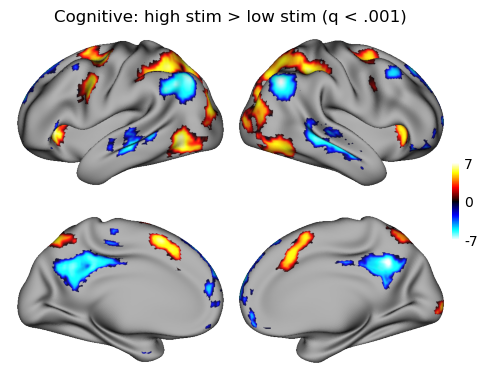

In [55]:
stimV_lh_processed, stimV_rh_processed = process_medial_wall(
    data_path='ttl1_6cond_stimlinear_dummy_C_simple_stimlin_high_gt_low_fdr-001.nii',
    spm_dir=spm_dir_6cond
)

taskname = 'cognitive'
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
plot_surf_box(surfaces, 
          surf_lh=stimV_lh_processed, 
          surf_rh= stimV_rh_processed, 
          title=f'{taskname.title()}: high stim > low stim (q < .001)')

## plot SPM CESO pain maps

### pain    

In [ ]:
stimV_lh_processed, stimV_rh_processed = process_medial_wall(
    data_path='NAME',
    spm_dir=spm_dir_6cond
)

taskname = ''
surfaces = neuromaps.datasets.fetch_fslr(density='32k', data_dir='/tmp')
plot_surf_box(surfaces, 
          surf_lh=stimV_lh_processed, 
          surf_rh= stimV_rh_processed, 
          title=f'{taskname.title()}: high stim > low stim (q < .001)')

### vicarious

### cognitive

## plot nilearn pain  (CESO-like)